In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df=pd.read_csv('homeprice.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


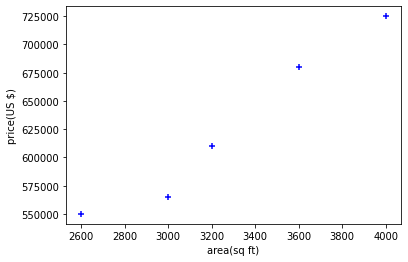

In [3]:
%matplotlib inline
plt.xlabel('area(sq ft)')
plt.ylabel('price(US $)')
plt.scatter(df.area, df.price,color='blue',marker='+')

In [4]:
new_df=df.drop('price', axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [5]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [6]:
# Creating Linear regression object

reg=linear_model.LinearRegression()
# reg.fit(df[['area']],df.price)
reg.fit(new_df,price)

LinearRegression()

In [7]:
# predict price of home with area=3000sq ft

reg.predict([[3000]])

C:\Users\shruti.randive\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([587979.45205479])

In [8]:
# m ->slope

reg.coef_

array([135.78767123])

In [9]:
# y ->intercept

reg.intercept_

180616.43835616432

In [10]:
# y = mx + c

135.78767123 * 3000 + 180616.43835616432

587979.4520461643

In [11]:
# predict price of home with area=3000sq ft

reg.predict([[5000]])

C:\Users\shruti.randive\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([859554.79452055])

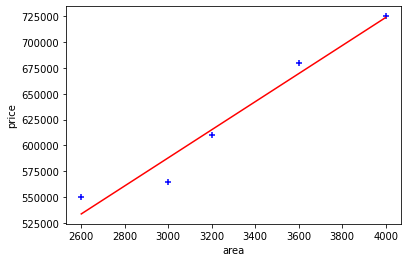

In [12]:
%matplotlib inline
plt.xlabel('area', fontsize=10)
plt.ylabel('price', fontsize=10)
plt.scatter(df.area, df.price,color='blue',marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='red')

In [13]:
# predict house price for list of only areas (sq ft) in new csv file

area_df = pd.read_csv('areas.csv')
area_df

,area
0,1000
1,1150
2,2000
3,2500
4,3000
5,123456
6,67890


In [14]:
# prediction of prices 

pred = reg.predict(area_df)
pred

array([  316404.10958904,   336772.26027397,   452191.78082192,
         520085.61643836,   587979.45205479, 16944419.17808219,
        9399241.43835617])

In [15]:
# adding new column in area_df as 'prices'

area_df['prices'] = pred
area_df

,area,prices
0,1000,3.164041e+05
1,1150,3.367723e+05
2,2000,4.521918e+05
3,2500,5.200856e+05
4,3000,5.879795e+05
5,123456,1.694442e+07
6,67890,9.399241e+06


In [16]:
# save this prediction by creating another new csv file

area_df.to_csv("prediction.csv", index=False)